# Bigrams, Stemming, and Lemmatizing

## 1. Exploring the `reuters` corpus

In [1]:
from nltk.corpus import reuters

reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [2]:
reuters.fileids()[-1]

'training/9995'

In [3]:
len(reuters.fileids())

10788

In [4]:
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

In [5]:
reuters.sents('training/9993')[0]

['TECHNITROL',
 'INC',
 '&',
 'lt',
 ';',
 'TNL',
 '>',
 'SETS',
 'QUARTERLY',
 'Qtly',
 'div',
 '12',
 'cts',
 'vs',
 '12',
 'cts',
 'prior',
 'Pay',
 'April',
 '21',
 'Record',
 'April',
 'Seven']

## 2. Bigrams

We will look at word bigrams one last time, this time seeing how we can find the most common word bigrams in a corpus or subsection of it and display the information on a graph.

In [6]:
trade_words = reuters.words(categories='trade')
len(trade_words)

142723

In [7]:
trade_words_condensed = trade_words[:500]
trade_words_condensed

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

Let’s convert our condensed list of trade words to lowercase and filter out stop words.

In [8]:
from nltk.corpus import stopwords

trade_words_condensed = [
    w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')
]
trade_words_condensed[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting']

Now, let’s filter out punctuation.

In [9]:
import string

punctuation_combo = (
    [c + "\"" for c in string.punctuation]
    + ["\"" + c for c in string.punctuation]
    + [".-", ":-", "..", "..."]
)
trade_words_condensed = [
    w for w in trade_words_condensed if w not in string.punctuation and w not in punctuation_combo
]
trade_words_condensed[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction']

In [10]:
from nltk import bigrams

bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:5]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', 'japan')]

In [11]:
from nltk import FreqDist

bi_f_dist = FreqDist(bi_trade_words_condensed)

print('TOP 3 WORD BIGRAMS')
for word, frequency in bi_f_dist.most_common(3):
    print(word, frequency)

TOP 3 WORD BIGRAMS
('billion', 'dlrs') 4
('u', 'japan') 3
('south', 'korea') 3


<Axes: xlabel='Samples', ylabel='Counts'>

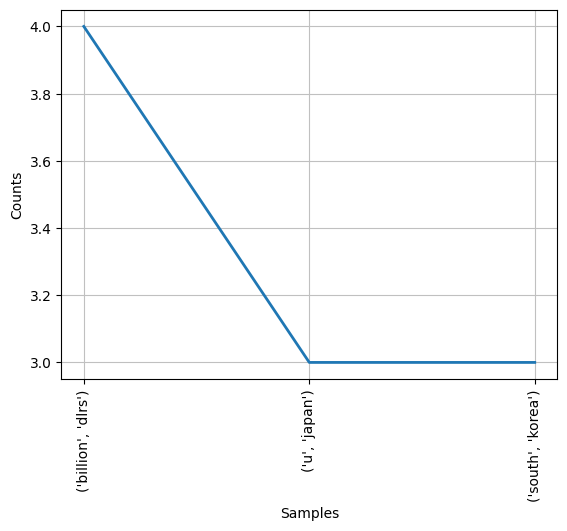

In [12]:
bi_f_dist.plot(3, cumulative=False)

## 3. Stemming

**Stemming** is a technique that lowers inflection in words to their root forms.

NLTK comes with several stemmers. `PorterStemmer` implements an old stemming algorithm originally published in 1979. `LancasterStemmer` implements the newer Lancaster Stemming Algorithm published in 1990. `SnowballStemmer`, also known as “Porter 2”, is considered optimal.

In [13]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import (
    SnowballStemmer,
)

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))

re-test re-testing re-test


`SnowballStemmer` can stem various other languages besides English. We can list the available languages.

In [14]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

We will try the stemmers with more input to observe further differences between them.

In [15]:
from nltk import word_tokenize

sentence = '''So, we'll go no more a-roving
              So late into the night,
              Though the heart be still as loving,
              And the moon be still as bright.'''

translator = str.maketrans('', '', string.punctuation)

tokens = word_tokenize(sentence.translate(translator))
tokens[:3]

['So', 'well', 'go']

In [16]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens])

['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']
['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright']
['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']


## 4. Lemmatizing

**Lemmatization** also aims to achieve a base “stem” for a word, but does so by deriving the genuine dictionary root word, not just a truncated version of the word.

The default lemmatization method provided by NLTK is `WordNetLemmatizer`, which utilizes the **WordNet** corpus—a large lexical database of English in which nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms.

In [17]:
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'))

brightening


As we see above, `WordNetLemmatizer` failed to lemmatize the word “brightening”. This is because it is essential to specify the correct part of speech when using the lemmatizer, and nouns are the default part of speech.

In [18]:
wnl.lemmatize('brightening', pos='v')

'brighten'